In [49]:
import numpy as np
import pandas as pd

In [51]:
# To read the dataset

df = pd.read_csv('/content/drive/MyDrive/SMSSpamCollection.csv', encoding = 'latin1')

In [52]:
# To get top 5 rows
df.head(5)

# To get bottom 5 rows
# df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [53]:
# view dimensions of dataset
df.shape

(5572, 5)

#### 1. Data cleaning
#### 2. EDA
#### 3. Text Preprocessing
#### 4. Model building
#### 5. Evaluation
#### 6. Improvement

## Data Cleaning

In [54]:
# To view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [55]:
# Dropping last 3 columns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [56]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
# Renaming columns

df.rename(columns = {'v1':'label','v2':'message'},inplace = True)

In [58]:
df.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [59]:
# To label the ham and spam (i.e., 0 and 1 respectively)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [60]:
df['label'] = encoder.fit_transform(df['label'])

In [61]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [62]:
# Checking Null values

df.isnull().sum()

label      0
message    0
dtype: int64

In [63]:
# Check for Duplicate values

df.duplicated().sum()

403

In [64]:
# 'keep' paramater is used for,if there are multiple rows with the same values in the specified columns, only the first one encountered will be kept, and the rest will be dropped.

df = df.drop_duplicates(keep = 'first')

In [65]:
df.duplicated().sum()

0

In [66]:
# Here we can see that duplicated rows are removed
df.shape

(5169, 2)

## EDA (Exploratory Data Analysis)

In [67]:
# To preview the no.of spam and ham messages in data

df['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

In [68]:
import matplotlib.pyplot as plt

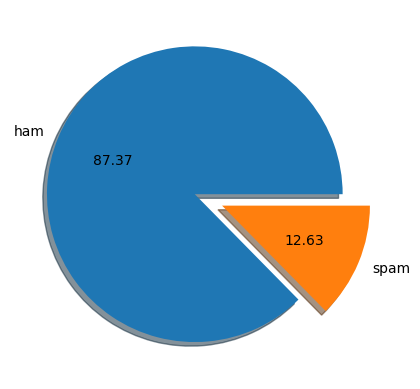

In [69]:
plt.pie(df['label'].value_counts(), labels = ['ham','spam'], autopct = '%0.2f', explode = [0,0.2], shadow = True)
plt.show()

In [72]:
import nltk
import string
from nltk.corpus import stopwords

In [73]:
nltk.download('punkt') # For Downloading some nltk dependencies

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [74]:
# Fetch number of characters in message
df['num_char'] = df['message'].apply(len)

In [75]:
df.head()

,label,message,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [76]:
# For fetching words by breaking the message

df['message'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [77]:
# To count the no.of words we use len() function

df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [78]:
df.head()

,label,message,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [79]:
# To count the no.of sentences in message

df['num_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [80]:
df.head()

,label,message,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [81]:
# To generate summary statistics of numerical columns

df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [82]:
# summary statistics of ham messages
df[df['label'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [83]:
# summary statistics of spam messages
df[df['label'] == 1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [84]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

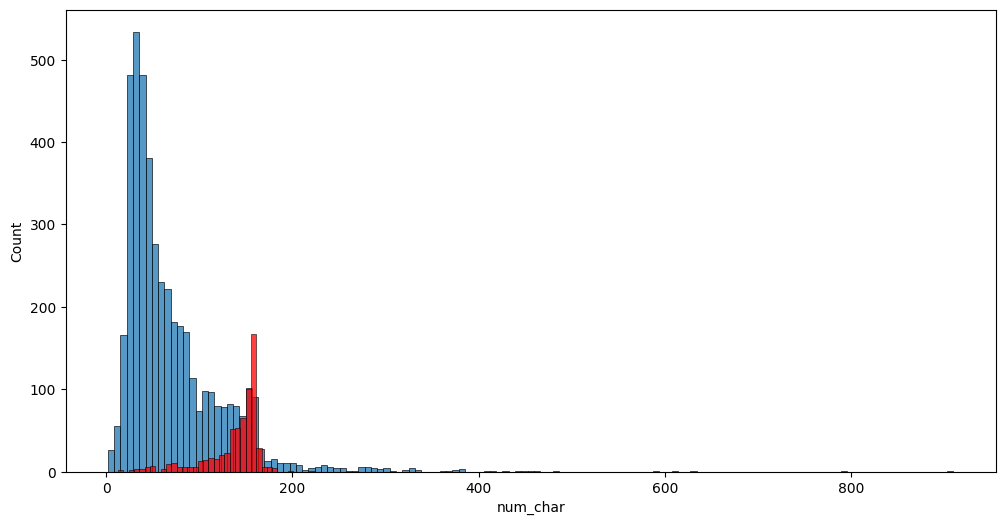

In [85]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_char'])
sns.histplot(df[df['label'] == 1]['num_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

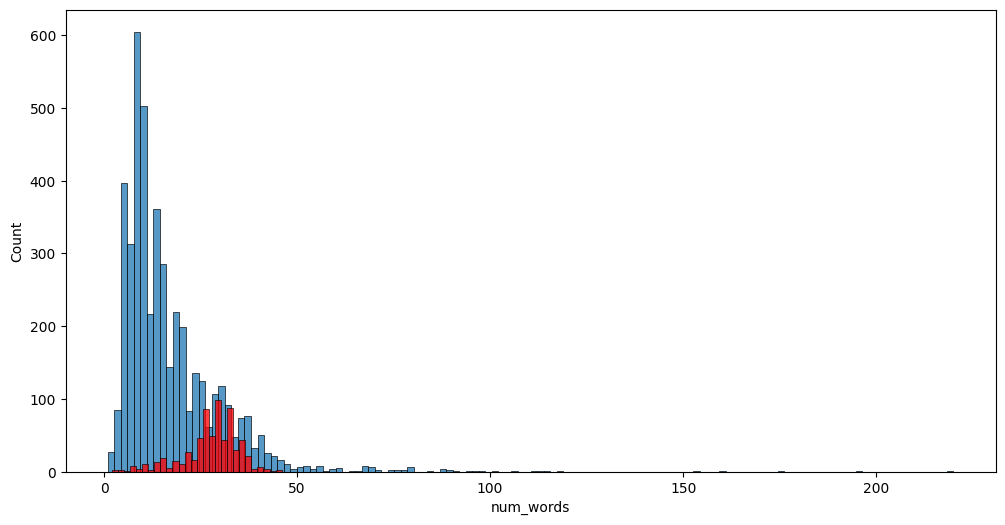

In [86]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'],color='red')

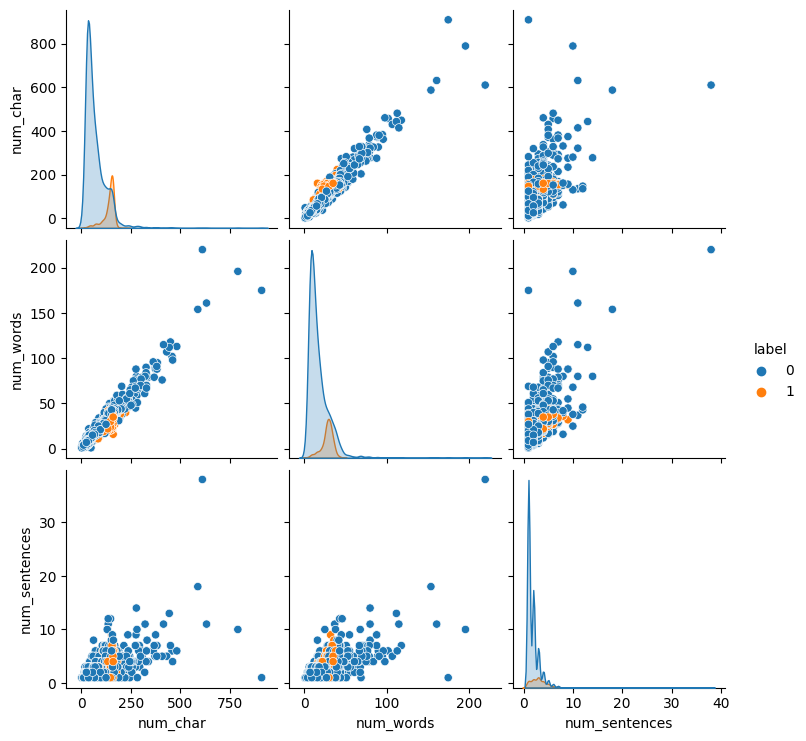

In [87]:
sns.pairplot(df,hue='label')

<ipython-input-88-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

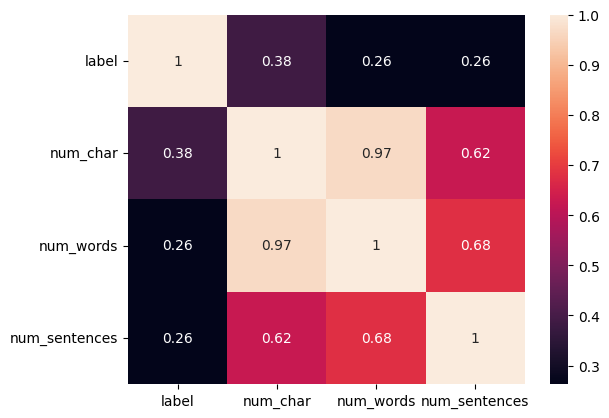

In [88]:
sns.heatmap(df.corr(),annot=True)

3. Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [91]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [96]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [94]:
def transform_message(message):
    message = message.lower()
    message = nltk.word_tokenize(message)

    y = []
    for i in message:
        if i.isalnum():
            y.append(i)
    message = y[:]
    y.clear()

    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message = y[:]
    y.clear()

    for i in message:
        y.append(ps.stem(i))

    return " ".join(y)

In [98]:
transform_message ("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [99]:
df['message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [100]:
ps.stem('loving')

'love'

In [101]:
df['transformed_message'] = df['message'].apply(transform_message)

In [103]:
df.head(5)

,label,message,num_char,num_words,num_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [107]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [108]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_message'].str.cat(sep=" "))

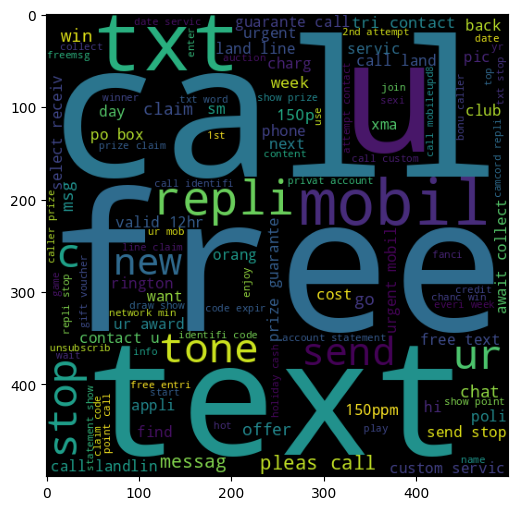

In [109]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [110]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_message'].str.cat(sep=" "))

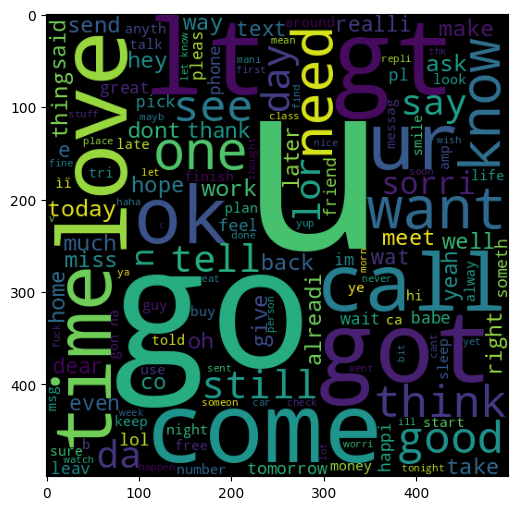

In [111]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [112]:
df.head(5)

,label,message,num_char,num_words,num_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [113]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [114]:
len(spam_corpus)

9939

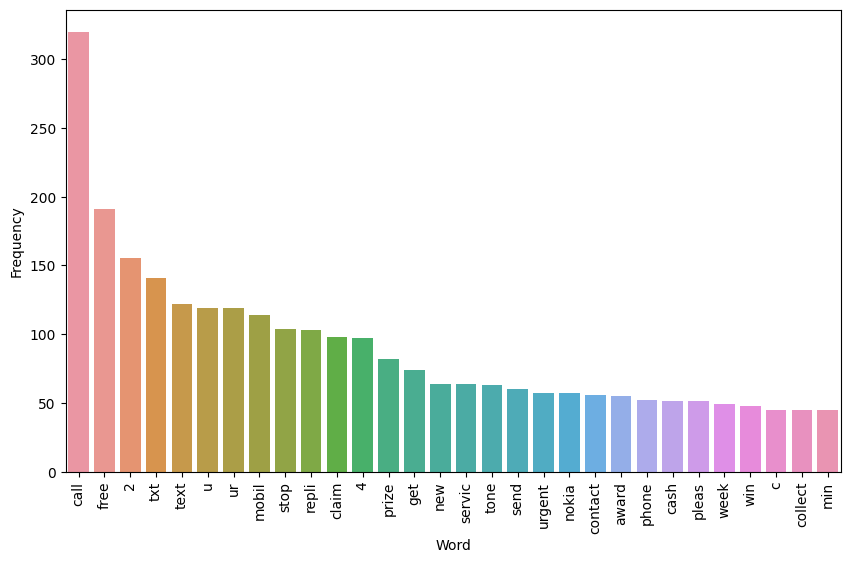

In [116]:
from collections import Counter
# Create a DataFrame from the Counter
data = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=["Word", "Frequency"])

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x="Word", y="Frequency", data=data)
plt.xticks(rotation='vertical')
plt.show()

In [118]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [119]:
len(ham_corpus)

35404

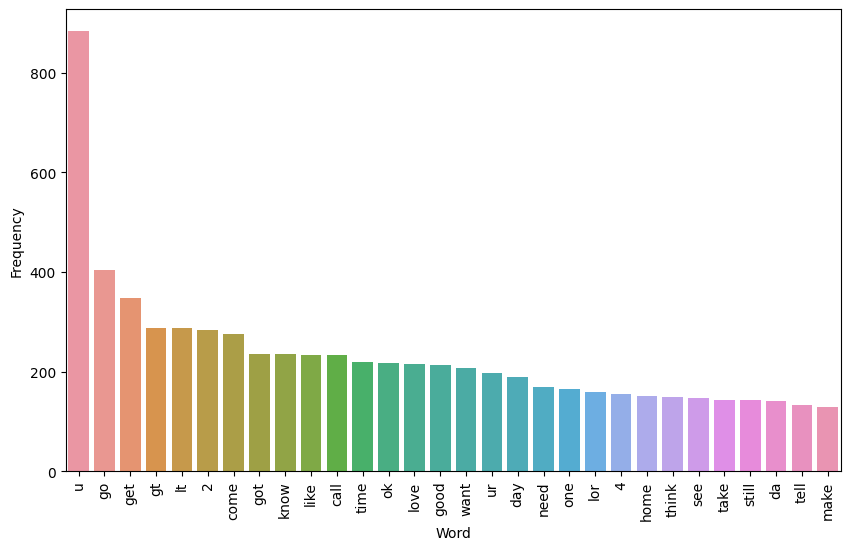

In [120]:
data = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=["Word", "Frequency"])

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x="Word", y="Frequency", data=data)
plt.xticks(rotation='vertical')
plt.show()

In [121]:
df.head(5)

,label,message,num_char,num_words,num_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Model Building

In [124]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [125]:
X = tfidf.fit_transform(df['transformed_message']).toarray()

In [126]:
X.shape

(5169, 3000)

In [127]:
y = df['label'].values

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [128]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [130]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred1))
print("Confusion_Matrix:",confusion_matrix(y_test,y_pred1))
print("Precision_Score:",precision_score(y_test,y_pred1))

Accuracy: 0.8694390715667312
Confusion_Matrix: [[788 108]
 [ 27 111]]
Precision_Score: 0.5068493150684932


In [131]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred2))
print("Confusion_Matrix:",confusion_matrix(y_test,y_pred2))
print("Precision_Score:",precision_score(y_test,y_pred2))

Accuracy: 0.9709864603481625
Confusion_Matrix: [[896   0]
 [ 30 108]]
Precision_Score: 1.0


In [132]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred3))
print("Confusion_Matrix:",confusion_matrix(y_test,y_pred3))
print("Precision_Score:",precision_score(y_test,y_pred3))

Accuracy: 0.9835589941972921
Confusion_Matrix: [[895   1]
 [ 16 122]]
Precision_Score: 0.991869918699187
